# Project: Investigating the gapminder dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
     <li><a href="#load-data">Data Loading</a></li>
     <li><a href="#clean-data">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
      <ul>
     <li><a href="#q1">Question One</a></li>
     <li><a href="#q2">Question Two</a></li>
     <li><a href="#q3">Question Three</a></li>
     <li><a href="#q4">Question Four</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Child mortality** – The probability that a child born in a specific year will die before reaching the age of five if subject to current age-specific mortality rates. Expressed as a rate per 1,000 live births.

> **Life expectancy at birth** – Life expectancy at birth (years) with projections. The average number of years a newborn child would live if current mortality patterns were to stay the same.

> **Population** - Total Population of a country per year

> **Income per person** – Gross Domestic Product per capita by Purchasing Power Parities (in US dollars). 

> **Children per Woman** - Total fertility rate,the number of children that would be born to each woman with prevailing age-specific fertility rates

***

### Questions for Analysis
>**One**: What has been the trend in fertility rate (children per woman) in West Africa from 2010 to 2020. -Which West Africa country has the highest average fertility rate from 2010 to 2020. -Which West Africa country has the highest and lowest average fertility rate in 2020

> **Two**:  What has been the changes in child mortality rate in West Africa from 2010 to 2020. -Which West Africa country has the highest average Mortality rate from 2010 to 2020. -Which West Africa country has the highest and lowest Mortality rate in 2020

> **Three**: What is the average Life Expectancy of West Africa countries from 2010 to 2020. Which West Africa country has the highest and lowest Life Expectancy in 2020

> **Four**: What is the average Income per person (In US Dollars) of West Africa countries.Which West Africa country has the highest average GPD from 2010 to 2020. Which West Africa country has the highest GDP as of 2020




### Load packages


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


<a id='load-data'></a>
#### Data Loading


In [3]:
#continent=pd.read_csv('continents.csv')
child_mortality = pd.read_csv('data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
children_per_woman = pd.read_csv('data/children_per_woman_total_fertility.csv')
df_gdp=pd.read_csv("data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
life_exp=pd.read_csv("data/life_expectancy_years.csv")
population=pd.read_csv("data/population_total.csv")


In [4]:
## A function to inspect our datasets
def inspect_data(df):
    #print the shape of the data
    print(df.shape)
    #print the number of duplicated data
    print(df.duplicated().sum())
    #print true if data has null/na,else false
    print(df.isnull().values.any())
    print(df.info())

In [5]:
#Inspect the child_mortality dataset
inspect_data(child_mortality)
child_mortality.head()

(197, 302)
0
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 464.9+ KB
None


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [6]:
#Inspect the children_per_woman dataset
inspect_data(children_per_woman)
children_per_woman.head()

(202, 302)
0
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB
None


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [7]:
#Inspect the children_per_woman dataset
inspect_data(life_exp) 
life_exp.head()

(195, 302)
0
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB
None


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [8]:
#Inspect the children_per_woman dataset
inspect_data(population)
population.head()

(197, 302)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB
None


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [9]:
#Inspect the children_per_woman dataset
inspect_data(df_gdp)
df_gdp.head()
# for i in list_of_dataset:
#    i.dropna(axis=1,inplace=True)
#    print(i.shape)

(195, 252)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB
None


,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


<a id='clean-data'></a>
### Data cleaning

> Using pandas melt() function from [here](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).The datasets are reshaped from the wide format to the long format containing three columns,i.e country,year,indicator(eg.country,year,population)

> Remove missing data from the datasets

> Convert gdp and population from str to float



### To make things easier, let write a fucntion to_long() 

In [10]:
#to_long() takes two arguments,a dataframe(df) and indicator name
def to_long(df,indicator):
        #melt to the long format
        df=df.melt(id_vars=['country'])
        #melt will return column names 'country','variable'and'value'
        #hence remane the rariable to year, and value to the indicator(eg.population)
        df.rename(columns={"variable":"year","value":indicator},inplace=True)
        return df
 

> Now, convert the datasets to the long format and drop all missing values

> Use the inspect_data() function to inspect the dataset now and

> have a view of our new dataset using the head() function

In [11]:
child_mortality=to_long(child_mortality,'child_mortality')
#drop missing data    
child_mortality.dropna(inplace=True)
#View the dataset format now
inspect_data(child_mortality)
child_mortality.head()

(57497, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57497 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          57497 non-null  object 
 1   year             57497 non-null  object 
 2   child_mortality  57497 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB
None


,country,year,child_mortality
0,Afghanistan,1799,469.0
1,Angola,1799,486.0
2,Albania,1799,375.0
4,United Arab Emirates,1799,434.0
5,Argentina,1799,402.0


In [12]:
children_per_woman=to_long(children_per_woman,'children_per_woman')
children_per_woman.dropna(inplace=True)
inspect_data(children_per_woman)
children_per_woman.head()

(60715, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60715 entries, 0 to 60801
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             60715 non-null  object 
 1   year                60715 non-null  object 
 2   children_per_woman  60715 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.9+ MB
None


,country,year,children_per_woman
0,Aruba,1799,5.64
1,Afghanistan,1799,7.00
2,Angola,1799,6.93
3,Albania,1799,4.60
4,Netherlands Antilles,1799,5.80


In [13]:
df_gdp=to_long(df_gdp,'gdp')
inspect_data(df_gdp)
df_gdp.head()

(48945, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48945 entries, 0 to 48944
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  48945 non-null  object
 1   year     48945 non-null  object
 2   gdp      48945 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
None


,country,year,gdp
0,Afghanistan,1799,683
1,Angola,1799,700
2,Albania,1799,755
3,Andorra,1799,1360
4,United Arab Emirates,1799,1130


GDP is in the type str, needs to be converted into float.
this cannot be achieved directly since it contains 'K'(for 1000)
now the 'k' needs to be striped off and convert to the thousand equivalent
I'm going to use the following steps to achieve that.


> **first** - make of a copy of the gdp data containing 'k'

In [14]:
df_gdp_with_k = df_gdp[df_gdp.gdp.str.contains('k', na=False)].copy()

> **second** - strip of the 'k', convert it to float and multiple by 1000

In [15]:
df_gdp_with_k.gdp=df_gdp_with_k['gdp'].apply(lambda x: float(x.strip('k'))*1000)


> **third** - drop the datasets containing 'k' from the original df_gdp datasets

In [16]:
df_gdp.drop(df_gdp_with_k.index,inplace=True)


> **fourth** - convert the rest of the gdp data to float


In [17]:

df_gdp.gdp=df_gdp.gdp.apply(lambda x:float(x))

> **fifth** - now append the converted gdp with 'k' to the origanl df_gdp dataset

In [18]:
df_gdp= df_gdp.append(df_gdp_with_k, ignore_index=True)
inspect_data(df_gdp)
df_gdp.head()


(48945, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48945 entries, 0 to 48944
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  48945 non-null  object 
 1   year     48945 non-null  object 
 2   gdp      48945 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB
None


,country,year,gdp
0,Afghanistan,1799,683.0
1,Angola,1799,700.0
2,Albania,1799,755.0
3,Andorra,1799,1360.0
4,United Arab Emirates,1799,1130.0


In [19]:
life_exp=to_long(life_exp,'life_expectancy')
life_exp.dropna(inplace=True)
inspect_data(life_exp)
life_exp.head()

(56616, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56616 entries, 0 to 58694
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56616 non-null  object 
 1   year             56616 non-null  object 
 2   life_expectancy  56616 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB
None


,country,year,life_expectancy
0,Afghanistan,1799,28.2
1,Angola,1799,27.0
2,Albania,1799,35.4
4,United Arab Emirates,1799,30.7
5,Argentina,1799,33.2


In [20]:
population=to_long(population,'population')  
inspect_data(population)
population.head()

(59297, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     59297 non-null  object
 1   year        59297 non-null  object
 2   population  59297 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None


,country,year,population
0,Afghanistan,1799,3.28M
1,Angola,1799,1.57M
2,Albania,1799,400k
3,Andorra,1799,2650
4,United Arab Emirates,1799,40.2k


> Population is in the type str instead of float.
This is because it contains 'k' (for thousand),'M' for (million) and 'B' for (Billion)
Again, just like I did for the gdp, I'm going to do same for the population data

In [21]:
population_with_k =population[population.population.str.contains('k', na=False)].copy()
population_with_k.population=population_with_k.population.apply(lambda x: x.strip('k')).astype(float)*1000

In [22]:
population_with_M =population[population.population.str.contains('M')].copy()
population_with_M.population =population_with_M.population.apply(lambda x: float(x.strip('M'))*1000000)

In [23]:
population_with_B =population[population.population.str.contains('B')].copy()
population_with_B.population =population_with_B.population.apply(lambda x: float(x.strip('B'))*1000000000)

In [24]:
population.drop(population_with_k.index,inplace=True)
population.drop(population_with_M.index,inplace=True)
population.drop(population_with_B.index,inplace=True)
population.population=population.population.apply(lambda x:float(x))


In [25]:
population = population.append(population_with_k,ignore_index=True)
population = population.append(population_with_M,ignore_index=True)
population= population.append(population_with_B,ignore_index=True)
inspect_data(population)

(59297, 3)
0
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     59297 non-null  object 
 1   year        59297 non-null  object 
 2   population  59297 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB
None


> Now, I'm going to merge all the datasets to one dataset containing all the indicstors needed for the analysis

In [26]:

df_combined=pd.merge(population,df_gdp, how='inner', on=['country','year'])
df_combined=df_combined.merge(life_exp,how='inner', on=['country','year'])
df_combined=df_combined.merge(child_mortality,how='inner', on=['country','year'])
df_combined=df_combined.merge(children_per_woman,how='inner', on=['country','year'])

df_combined.head()

,country,year,population,gdp,life_expectancy,child_mortality,children_per_woman
0,Brunei,1799,2260.0,1710.0,29.2,455.0,7.06
1,Brunei,1800,2260.0,1710.0,29.2,455.0,7.06
2,Brunei,1801,2260.0,1710.0,29.2,455.0,7.06
3,Brunei,1802,2260.0,1710.0,29.2,455.0,7.06
4,Brunei,1803,2260.0,1710.0,29.2,455.0,7.06


In [27]:
df_combined.year=df_combined.year.apply(lambda x:int(x))
inspect_data(df_combined)

(46536, 7)
0
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46536 entries, 0 to 46535
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             46536 non-null  object 
 1   year                46536 non-null  int64  
 2   population          46536 non-null  float64
 3   gdp                 46536 non-null  float64
 4   life_expectancy     46536 non-null  float64
 5   child_mortality     46536 non-null  float64
 6   children_per_woman  46536 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.8+ MB
None


<a id='eda'></a>
## Exploratory Data Analysis

In [28]:
df_combined.describe()

,year,population,gdp,life_expectancy,child_mortality,children_per_woman
count,46536.000000,4.653600e+04,46536.000000,46536.000000,46536.000000,46536.000000
mean,1924.713555,1.819045e+07,7818.546416,47.602955,255.655283,5.005457
std,72.904957,8.545373e+07,16258.047794,18.714088,176.248516,1.865060
min,1799.000000,2.260000e+03,224.000000,1.010000,0.730000,0.900000
25%,1861.000000,4.960000e+05,1040.000000,32.000000,57.500000,3.437500
50%,1925.000000,2.420000e+06,1960.000000,38.900000,307.000000,5.700000
75%,1988.000000,8.962500e+06,5840.000000,66.400000,415.000000,6.510000
max,2050.000000,1.640000e+09,209000.000000,88.600000,756.000000,8.870000


In [29]:
years=[2010,2011, 2012,2013,2014,2015, 2016,2017,2018,2019,2020]
west_african_countries=['Benin','Burkina Faso',"Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea','Guinea-Bissau',' Liberia','Mali', 'Mauritania','Niger','Nigeria', 'Senegal','Sierra Leone', 'Togo']
west_africa=df_combined.query("country==@west_african_countries").copy()
west_africa.head()

,country,year,population,gdp,life_expectancy,child_mortality,children_per_woman
92,Benin,1799,637000.0,676.0,31.0,430.0,5.55
119,Guinea,1799,984000.0,509.0,29.5,451.0,6.11
120,Gambia,1799,103000.0,920.0,28.8,460.0,6.51
121,Guinea-Bissau,1799,218000.0,641.0,32.0,417.0,7.25
150,Mauritania,1799,383000.0,597.0,32.0,417.0,6.34


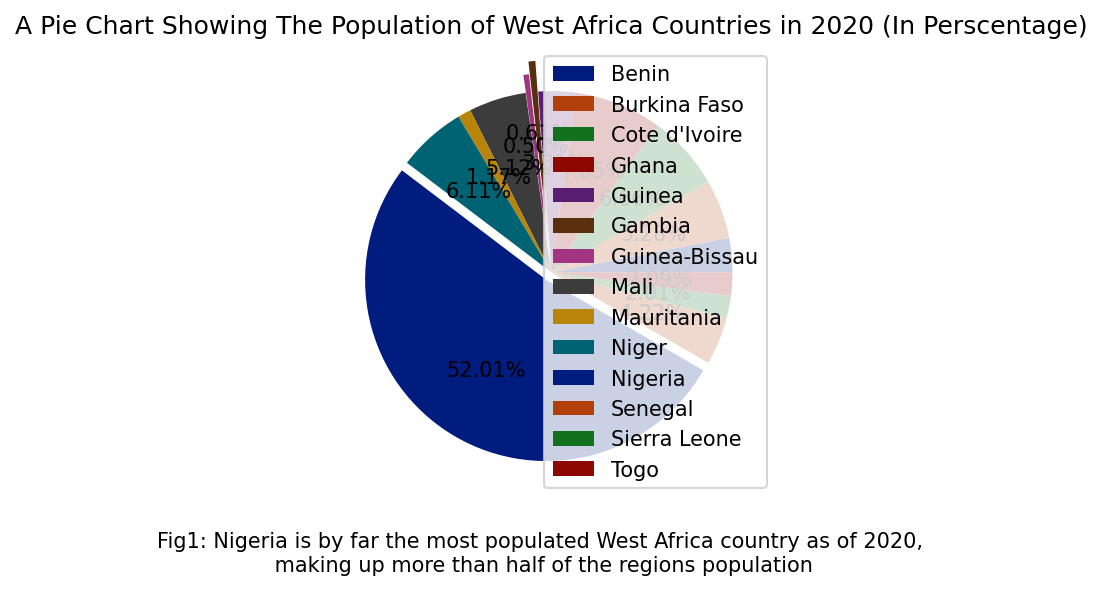

In [30]:
plt.figure(dpi=150)
palette_color = sns.color_palette('dark')
plt.pie(west_africa.query("year==2020").population,
        colors=palette_color, explode=(0, 0, 0, 0,0,0.17, 0.1, 0, 0,0,0.05, 0, 0, 0),autopct='%1.2f%%')
plt.legend(west_africa.query("year==2020").country, loc="lower right")
plt.title('A Pie Chart Showing The Population of West Africa Countries in 2020 (In Perscentage)')
csfont = {'fontname':'Comic Sans MS'}
txt="Fig1: Nigeria is by far the most populated West Africa country as of 2020,\n making up more than half of the regions population"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<a id='q1'></a>
### Research Question 1
>What has been the trend in fertility rate (children per woman) in West Africa from 2010 to 2020.

>Which West Africa country has the highest average fertility rate from 2010 to 2020. 

>Which West Africa country has the highest and lowest average fertility rate in 2020

In [31]:
west_africa.query('year==@years').groupby(['country'])['children_per_woman'].mean()

country
Benin            5.042727
Burkina Faso     5.441818
Cote d'Ivoire    4.958182
Gambia           5.463636
Ghana            4.030000
Guinea           4.938182
Guinea-Bissau    4.702727
Mali             6.138182
Mauritania       4.722727
Niger            7.272727
Nigeria          5.572727
Senegal          4.811818
Sierra Leone     4.593636
Togo             4.525455
Name: children_per_woman, dtype: float64

<a id='fig1.0'></a>

<Figure size 900x600 with 0 Axes>

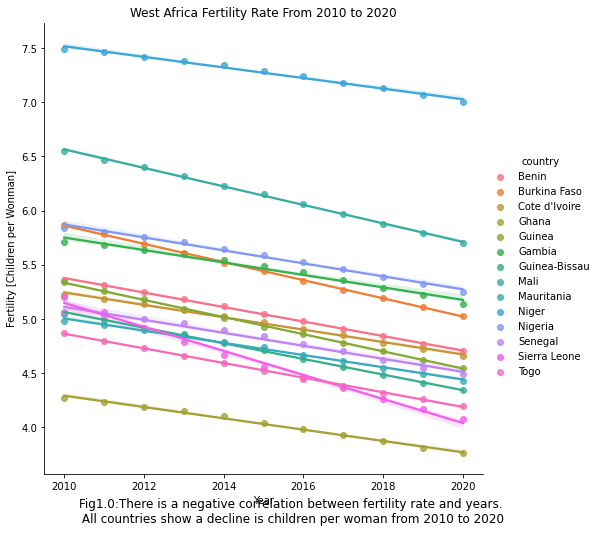

In [32]:
#Fig1.0
plt.figure(dpi=150)
sns.lmplot(data=west_africa.query('year==@years'), x="year", y="children_per_woman", hue="country",height = 7)
plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Fertility [Children per Wonman]')
plt.title('West Africa Fertility Rate From 2010 to 2020')
txt="Fig1.0:There is a negative correlation between fertility rate and years.\n All countries show a decline is children per woman from 2010 to 2020"
plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<a id='fig1.1'></a>

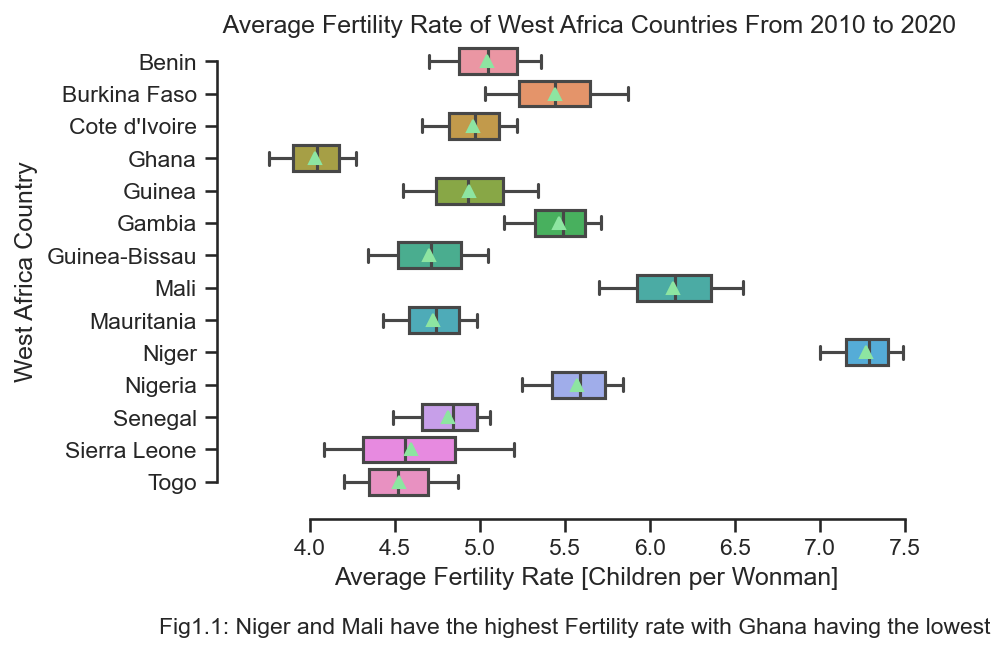

In [33]:
#Fig1.1
sns.set_theme(style="ticks", palette="pastel")
plt.figure(dpi=150)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="children_per_woman", y="country",
            showmeans=True,
            data=west_africa.query('year==@years'))
sns.despine(offset=10, trim=True)
plt.xlabel('Average Fertility Rate [Children per Wonman]')
plt.ylabel('West Africa Country')
plt.title(' Average Fertility Rate of West Africa Countries From 2010 to 2020')
txt="Fig1.1: Niger and Mali have the highest Fertility rate with Ghana having the lowest"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

<a id='fig1.2'></a>

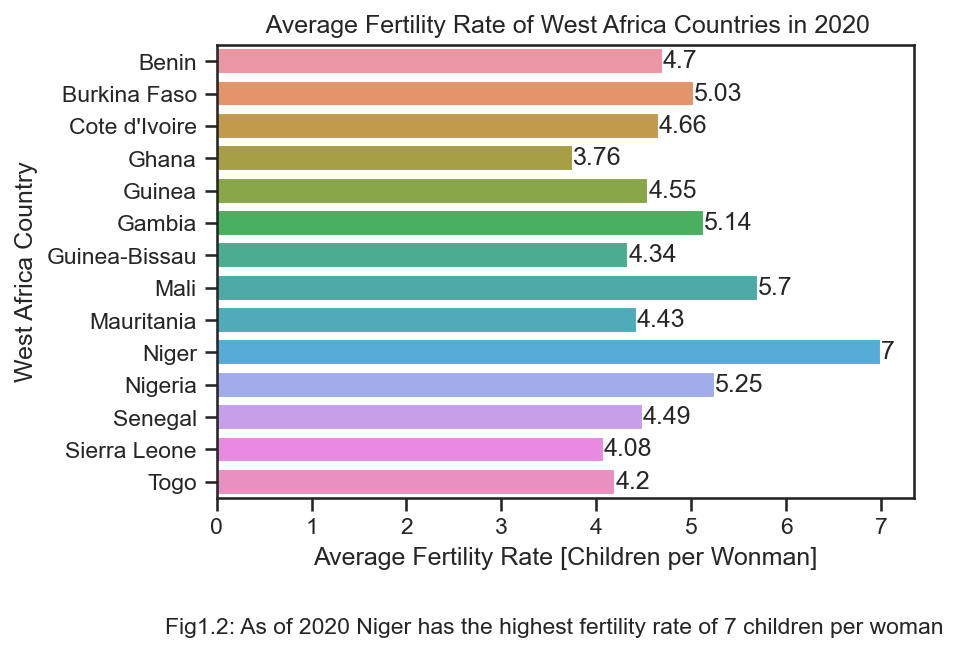

In [34]:
#Fig1.2
plt.figure(dpi=150)
fig001=sns.barplot(x="children_per_woman", y="country", data=west_africa.query("year==2020"),
            label="")
fig001.bar_label(fig001.containers[0])
plt.xlabel('Average Fertility Rate [Children per Wonman]')
plt.ylabel('West Africa Country')
plt.title(' Average Fertility Rate of West Africa Countries in 2020')
txt="Fig1.2: As of 2020 Niger has the highest fertility rate of 7 children per woman"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

<a id='q2'></a>
### Research Question 2
> What has been the changes in child mortality rate in West Africa from 2010 to 2020. 

>Which West Africa country has the highest average Mortality rate from 2010 to 2020. 

>Which West Africa country has the highest and lowest Mortality rate in 2020




<a id='fig2.0'></a>

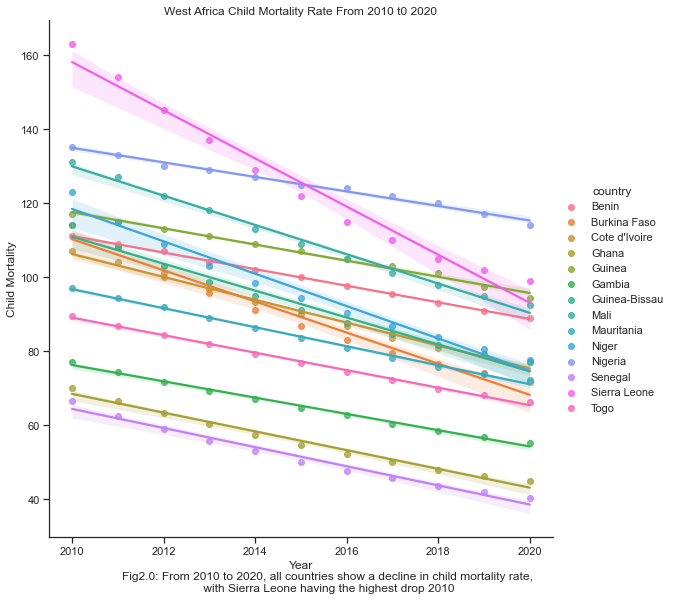

In [35]:
#Fig2.0
sns.lmplot(data=west_africa.query('year==@years'), x="year", y="child_mortality", hue="country",height = 8)
plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Child Mortality')
plt.title('West Africa Child Mortality Rate From 2010 t0 2020')
txt="Fig2.0: From 2010 to 2020, all countries show a decline in child mortality rate,\n with Sierra Leone having the highest drop 2010"
plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<a id='fig2.1'></a>

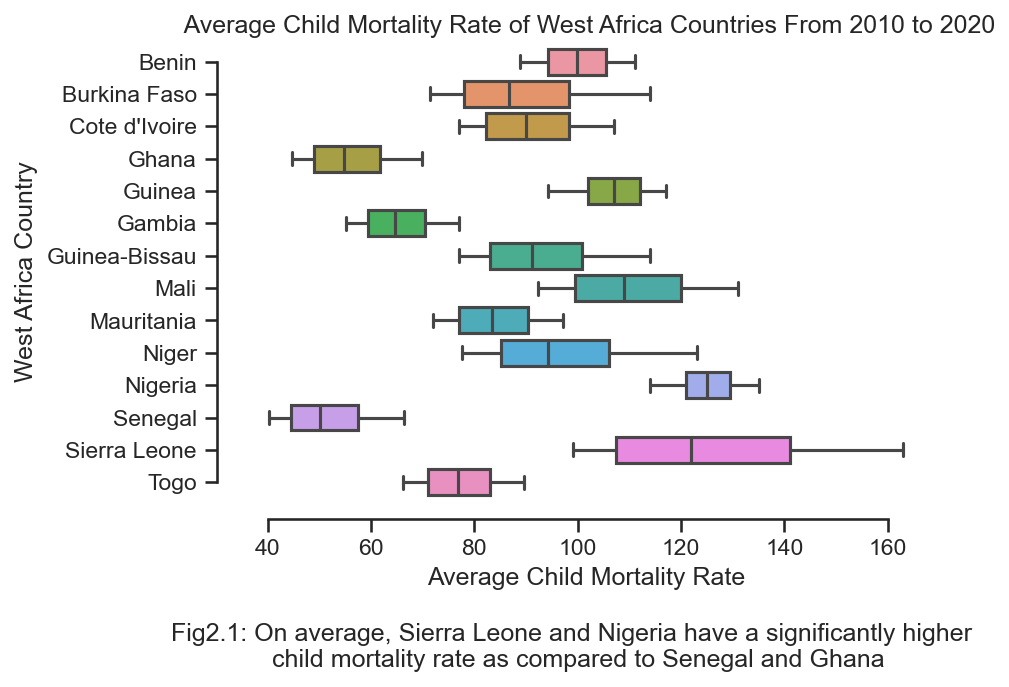

In [36]:
#Fig2.1
sns.set_theme(style="ticks", palette="pastel")
plt.figure(dpi=150)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="child_mortality", y="country",
            
            data=west_africa.query('year==@years'))
sns.despine(offset=10, trim=True)
plt.xlabel('Average Child Mortality Rate')
plt.ylabel('West Africa Country')
plt.title(' Average Child Mortality Rate of West Africa Countries From 2010 to 2020')
txt="Fig2.1: On average, Sierra Leone and Nigeria have a significantly higher \n child mortality rate as compared to Senegal and Ghana"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [37]:
west_africa.query("year==2020").sort_values(by="child_mortality",ascending = False)

,country,year,population,gdp,life_expectancy,child_mortality,children_per_woman
41591,Nigeria,2020,206000000.0,4920.0,64.5,114.0,5.25
41616,Sierra Leone,2020,7980000.0,1640.0,61.9,99.0,4.08
41542,Guinea,2020,13100000.0,2660.0,61.3,94.3,4.55
41581,Mali,2020,20300000.0,2230.0,62.0,92.4,5.70
41503,Benin,2020,12100000.0,3320.0,64.6,88.8,4.70
41590,Niger,2020,24200000.0,1220.0,62.6,77.7,7.00
41517,Cote d'Ivoire,2020,26400000.0,5180.0,64.4,77.1,4.66
41544,Guinea-Bissau,2020,1970000.0,1930.0,61.0,77.1,4.34
41585,Mauritania,2020,4650000.0,5140.0,70.7,72.1,4.43
41504,Burkina Faso,2020,20900000.0,2160.0,61.8,71.5,5.03


<a id='fig2.2'></a>

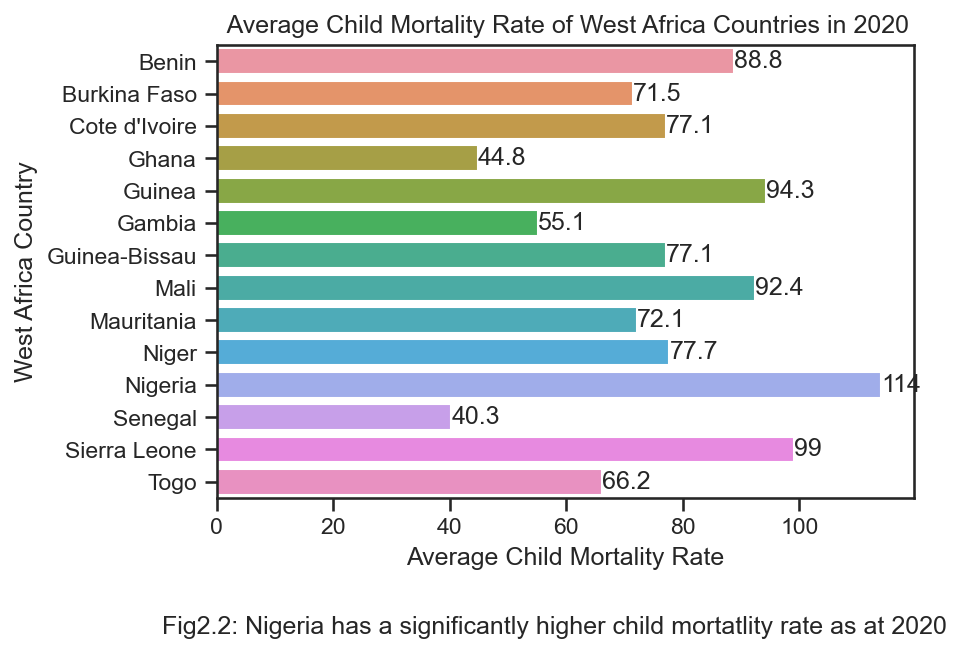

In [38]:
#Fig2.2
plt.figure(dpi=150)
fig001= sns.barplot(x="child_mortality", y="country", data=west_africa.query("year==2020"),
            label="")
fig001.bar_label(fig001.containers[0])
plt.xlabel('Average Child Mortality Rate')
plt.ylabel('West Africa Country')
plt.title(' Average Child Mortality Rate of West Africa Countries in 2020')
txt="Fig2.2: Nigeria has a significantly higher child mortatlity rate as at 2020"
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


<a id='q3'></a>
### Research Question 3
> What is the average Life Expectancy of West Africa countries from 2010 to 2020.

>Which West Africa country has the highest and lowest Life Expectancy in 2020



<a id='fig3.0'></a>

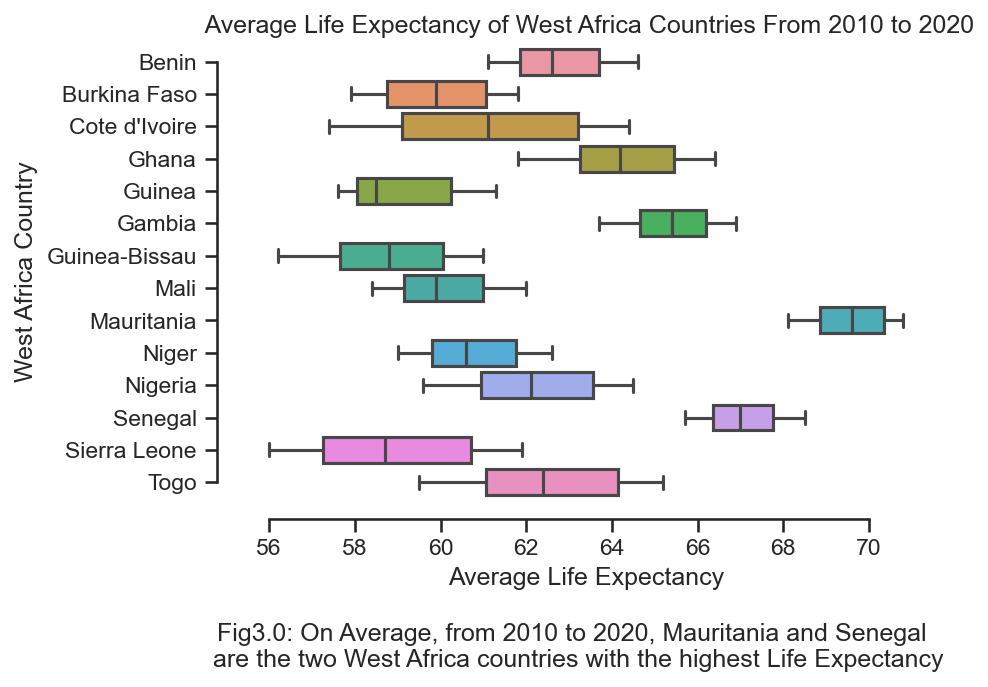

In [39]:

#Fig3.0
sns.set_theme(style="ticks", palette="pastel")
plt.figure(dpi=150)
sns.boxplot(x="life_expectancy", y="country",
data=west_africa.query('year==@years'))
sns.despine(offset=10, trim=True)
plt.xlabel('Average Life Expectancy')
plt.ylabel('West Africa Country')
plt.title(' Average Life Expectancy of West Africa Countries From 2010 to 2020')
txt="Fig3.0: On Average, from 2010 to 2020, Mauritania and Senegal \n are the two West Africa countries with the highest Life Expectancy"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<a id='fig3.1'></a>

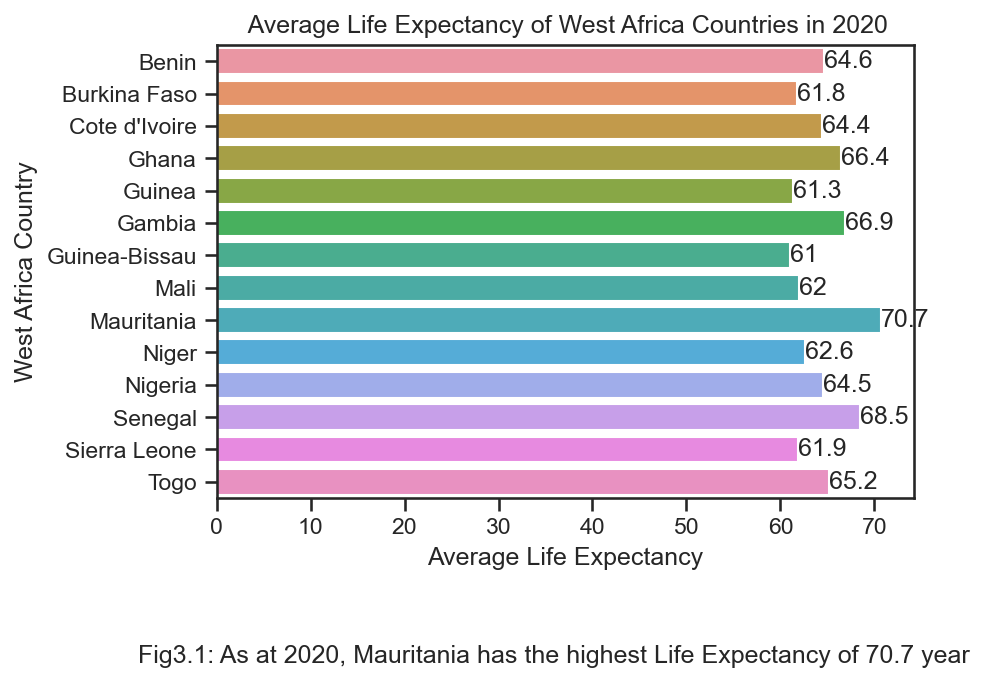

In [40]:
#FIg3.1
plt.figure(dpi=150)
fig001= sns.barplot(x="life_expectancy", y="country", data=west_africa.query("year==2020"),
            label="")
fig001.bar_label(fig001.containers[0])
plt.xlabel('Average Life Expectancy')
plt.ylabel('West Africa Country')
plt.title(' Average Life Expectancy of West Africa Countries in 2020')
txt="Fig3.1: As at 2020, Mauritania has the highest Life Expectancy of 70.7 year"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<a id='q4'></a>
### Question 4
>What is the average Income per person (In US Dollars) of West Africa countries.

>Which West Africa country has the highest average GPD from 2010 to 2020. 

>Which West Africa country has the highest GDP as of 2020

In [41]:
west_africa.query('year==@years').groupby(['country'])['life_expectancy'].mean()

country
Benin            62.781818
Burkina Faso     59.900000
Cote d'Ivoire    61.072727
Gambia           65.390909
Ghana            64.281818
Guinea           59.163636
Guinea-Bissau    58.809091
Mali             60.109091
Mauritania       69.563636
Niger            60.781818
Nigeria          62.181818
Senegal          67.090909
Sierra Leone     59.009091
Togo             62.500000
Name: life_expectancy, dtype: float64

<a id='fig4.0'></a>

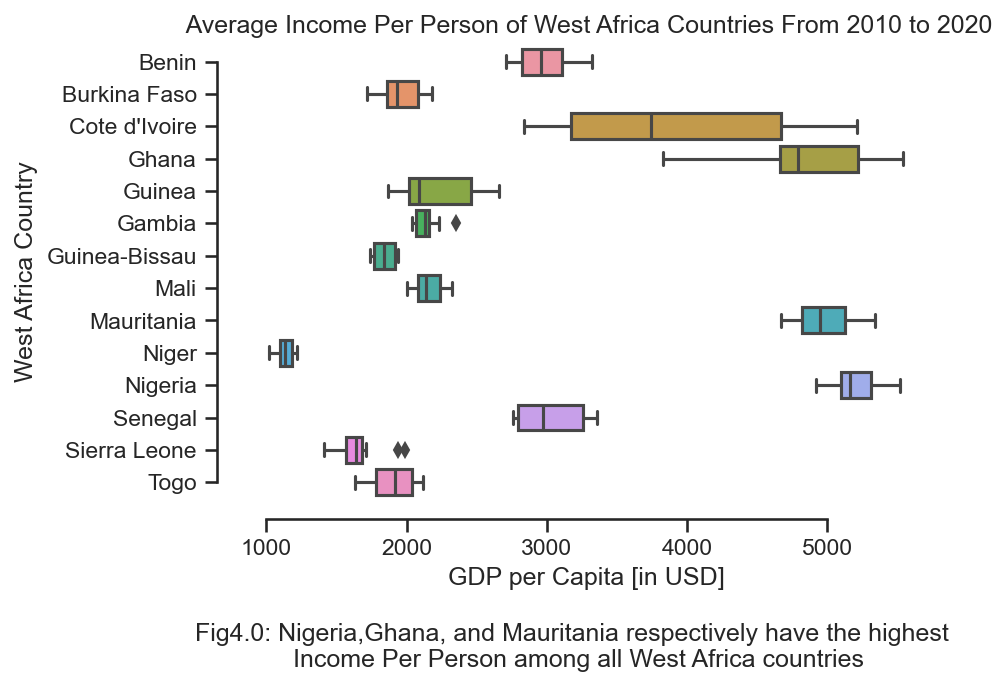

In [42]:

#Fig4.0
sns.set_theme(style="ticks", palette="pastel")
plt.figure(dpi=150)
sns.boxplot(x="gdp", y="country",
data=west_africa.query('year==@years'))
sns.despine(offset=10, trim=True)
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('West Africa Country')
plt.title(' Average Income Per Person of West Africa Countries From 2010 to 2020')
txt="Fig4.0: Nigeria,Ghana, and Mauritania respectively have the highest \n Income Per Person among all West Africa countries"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


<a id='fig4.1'></a>

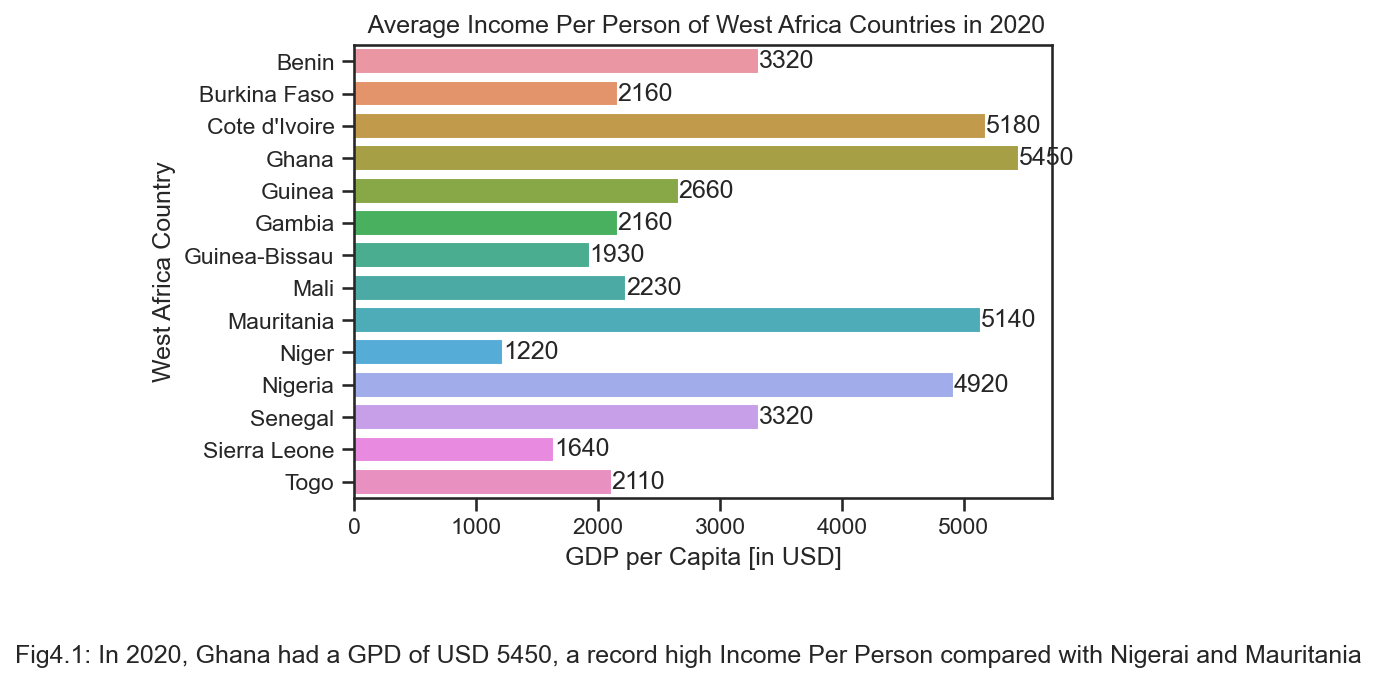

In [43]:
#Fig4.1
plt.figure(dpi=150)
fig001= sns.barplot(x="gdp", y="country", data=west_africa.query("year==2020"),label="")
fig001.bar_label(fig001.containers[0])
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('West Africa Country')
plt.title(' Average Income Per Person of West Africa Countries in 2020')
txt="Fig4.1: In 2020, Ghana had a GPD of USD 5450, a record high Income Per Person compared with Nigerai and Mauritania "
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<a id='conclusions'></a>
## Conclusions

> From <a href="#fig1.0">figure1.0</a>, it can be observed that the average fertility rate of all West Africa countries has been declining from 2010 to 2020 with Sierra Leone and Mali having the highest decline rate. The fertility of rate of Sierra Leone decline from 5.2 to 4.08 children per woman from 2010 to 2020 respectively.
From <a href="#fig1.1">figure1.1</a> Niger, Mali, and Nigeria has the highest average fertility rate of 7.2,6.1, and 5.5 children per woman respectively. Ghana has the lowest average fertility rate of 4 children per woman.
As at 2020 (<a href="#fig1.1">figure1.2</a>),Niger has the highest fertility rate of 7 children per woman, whiles Ghana has the lowest average fertility rate of 3.76 children per woman.

> From 2010 to 2020, the child mortality rate of West Africa countries has be decreasing (<a href="#fig2.0">figure2.0</a>). Sierre Leone has had a record decline in mortality rate of 163 from 2010 to 99 in 2020.
On average(from 2010 to 2020), Sierra Leone, Nigeria and Mali has the highest average child mortality of 125.85,125,and 110.1 respectively, with Senegal and Ghana having the lowest average child mortality rate (<a href="#fig2.1">figure2.1</a> ).
As at 2020, Nigeria and Sierra Leone has the highest average child mortality rate of 114 and 99 respectively (<a href="#fig2.2">figure2.2</a> ).

>Mauritania and Senegal are the two West Africa countries with the highest average life expectancy of 69.5 years and 67.0 years respectively(<a href="#fig3.0">figure3.0</a> ).

> Nigeria, Mauritania and Ghana have the highest Income Per Person in West Africa (<a href="#fig4.0">figure4.0</a> ). In 2020, Ghana and Cote'd Ivore had the higest Income Per Person of USD 5450 and USD 5180 respectively (<a href="#fig3.1">figure3.1</a> )

***

### Limitation
> In this analysis, all emphasis was on West Africa countries from 2010 to 2020 and no attention was given to neither Africa nor the World as a whole.